In [2]:
import cv2
import numpy
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

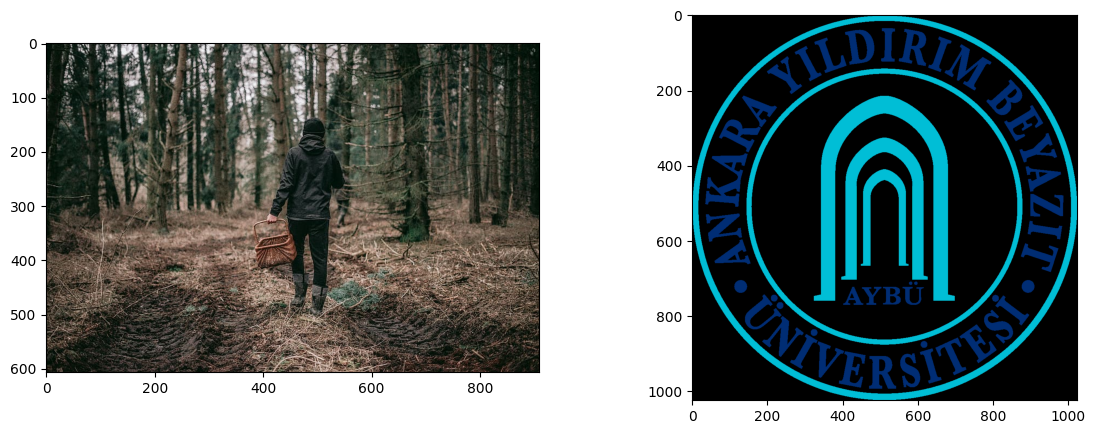

In [3]:
img1=cv2.imread("../img/forest2.jpg")
img2=cv2.imread("../img/AYBU_Logo.png")

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
# BGR to RGB [..., ::-1]
plt.imshow(img1[..., ::-1])
plt.subplot(1, 2, 2)
plt.imshow(img2[..., ::-1])

In [4]:
width,height,_=img1.shape

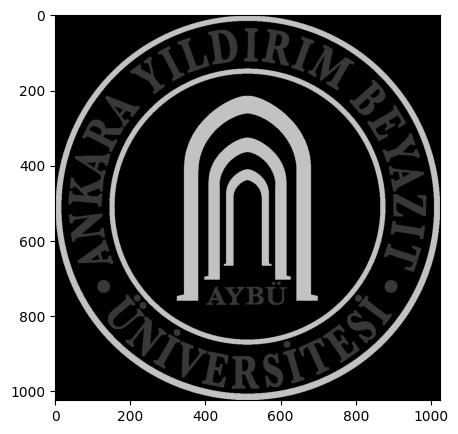

In [6]:
img2Gray=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(14, 5))
plt.imshow(img2Gray,cmap="grey")
plt.show()

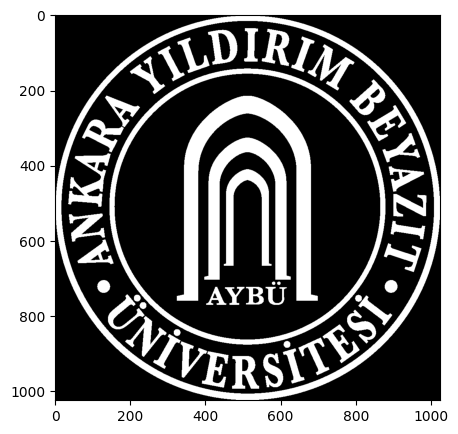

In [7]:
thresh=0
imgThresh = (img2Gray > thresh).astype(np.uint8) * 255

plt.figure(figsize=(14, 5))
plt.imshow(imgThresh,cmap="grey")
plt.show()

In [12]:
img2Resize=cv2.resize(img2,[150,150])

In [13]:
imgThresh=cv2.resize(imgThresh,[150,150])
widthThresh,heightThresh=imgThresh.shape

In [14]:
blankImage=np.ones([width,height])
startX,startY=50,50
blankImage[startX:startX+widthThresh,startY:startY+heightThresh]=imgThresh

In [15]:
color_image = np.zeros([width,height,3], dtype=np.uint8)
color_image[..., 0] = blankImage  # Kırmızı kanalı atayın
color_image[..., 1] = blankImage  # Yeşil kanalı atayın
color_image[..., 2] = blankImage  # Mavi kanalı atayın
color_imageNot=cv2.bitwise_not(color_image)

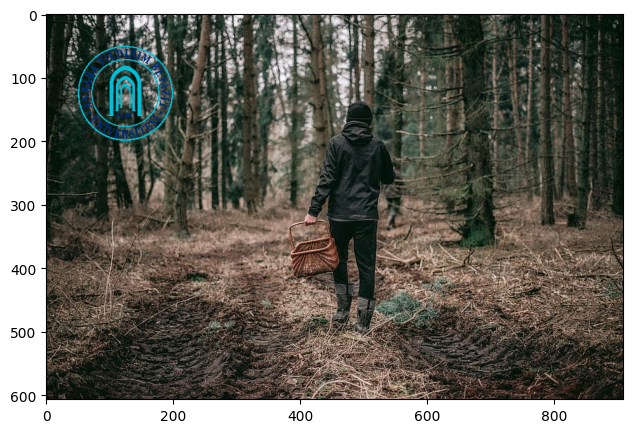

In [18]:
mask1=cv2.bitwise_and(color_imageNot,img1)
color_imageCopy1=color_image
color_imageCopy2=color_image
color_imageCopy3=color_image
color_imageCopy1[startX:startX+widthThresh,startY:startY+heightThresh,:]=img2Resize
result1=cv2.bitwise_or(color_imageCopy1,mask1)

plt.figure(figsize=(14, 5))
plt.imshow(result1[..., ::-1])
plt.show()

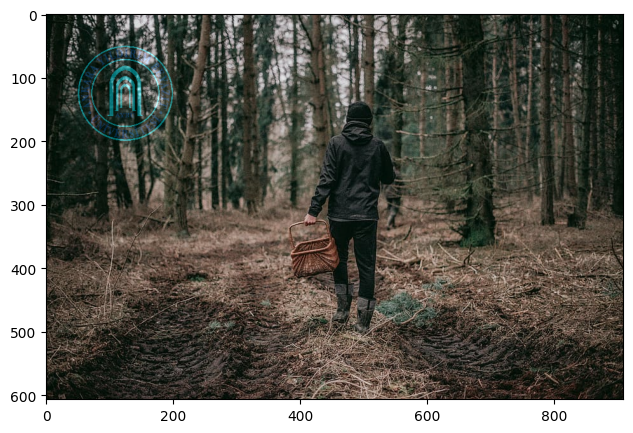

In [26]:
background = np.zeros_like(img1)
background[startX:startX+widthThresh,startY:startY+heightThresh] = img2Resize
alpha=0.9
beta=0.5
gama=0.5
newImage=cv2.addWeighted(img1,alpha,background,beta,gama)

plt.figure(figsize=(14, 5))
plt.imshow(newImage[..., ::-1])
plt.show()